# Lecture 5: Time Series and Longitudinal Data

### Objectives
- Plot changes over time using line plots
- Show individual or group-level trends
- Summarize repeated measures with confidence intervals
- Highlight interventions with vertical lines or shaded regions

## Simulated Dataset for Longitudinal Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
np.random.seed(42)

In [2]:
# Simulate longitudinal data
n = 100  # individuals
times = [0, 1]  # before and after policy

data = []
for person in range(n):
    base = np.random.normal(4, 2)
    effect = np.random.normal(-0.5, 0.5) if np.random.rand() < 0.5 else 0  # simulate some change
    for t in times:
        score = base + t * effect + np.random.normal(0, 0.3)
        data.append({"id": person, "time": t, "depression": score})

long_df = pd.DataFrame(data)

## Line Plot of One Individual

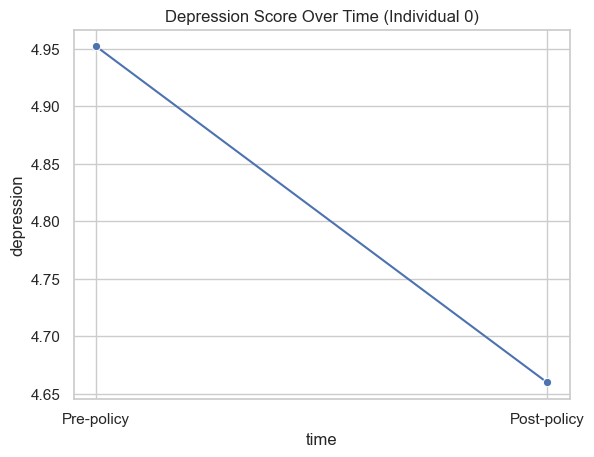

In [3]:
# Plot a single individual's trajectory
sns.lineplot(data=long_df[long_df['id'] == 0], x='time', y='depression', marker='o')
plt.title('Depression Score Over Time (Individual 0)')
plt.xticks([0, 1], labels=['Pre-policy', 'Post-policy'])
plt.show()

## Faceted Line Plots for Multiple Individuals

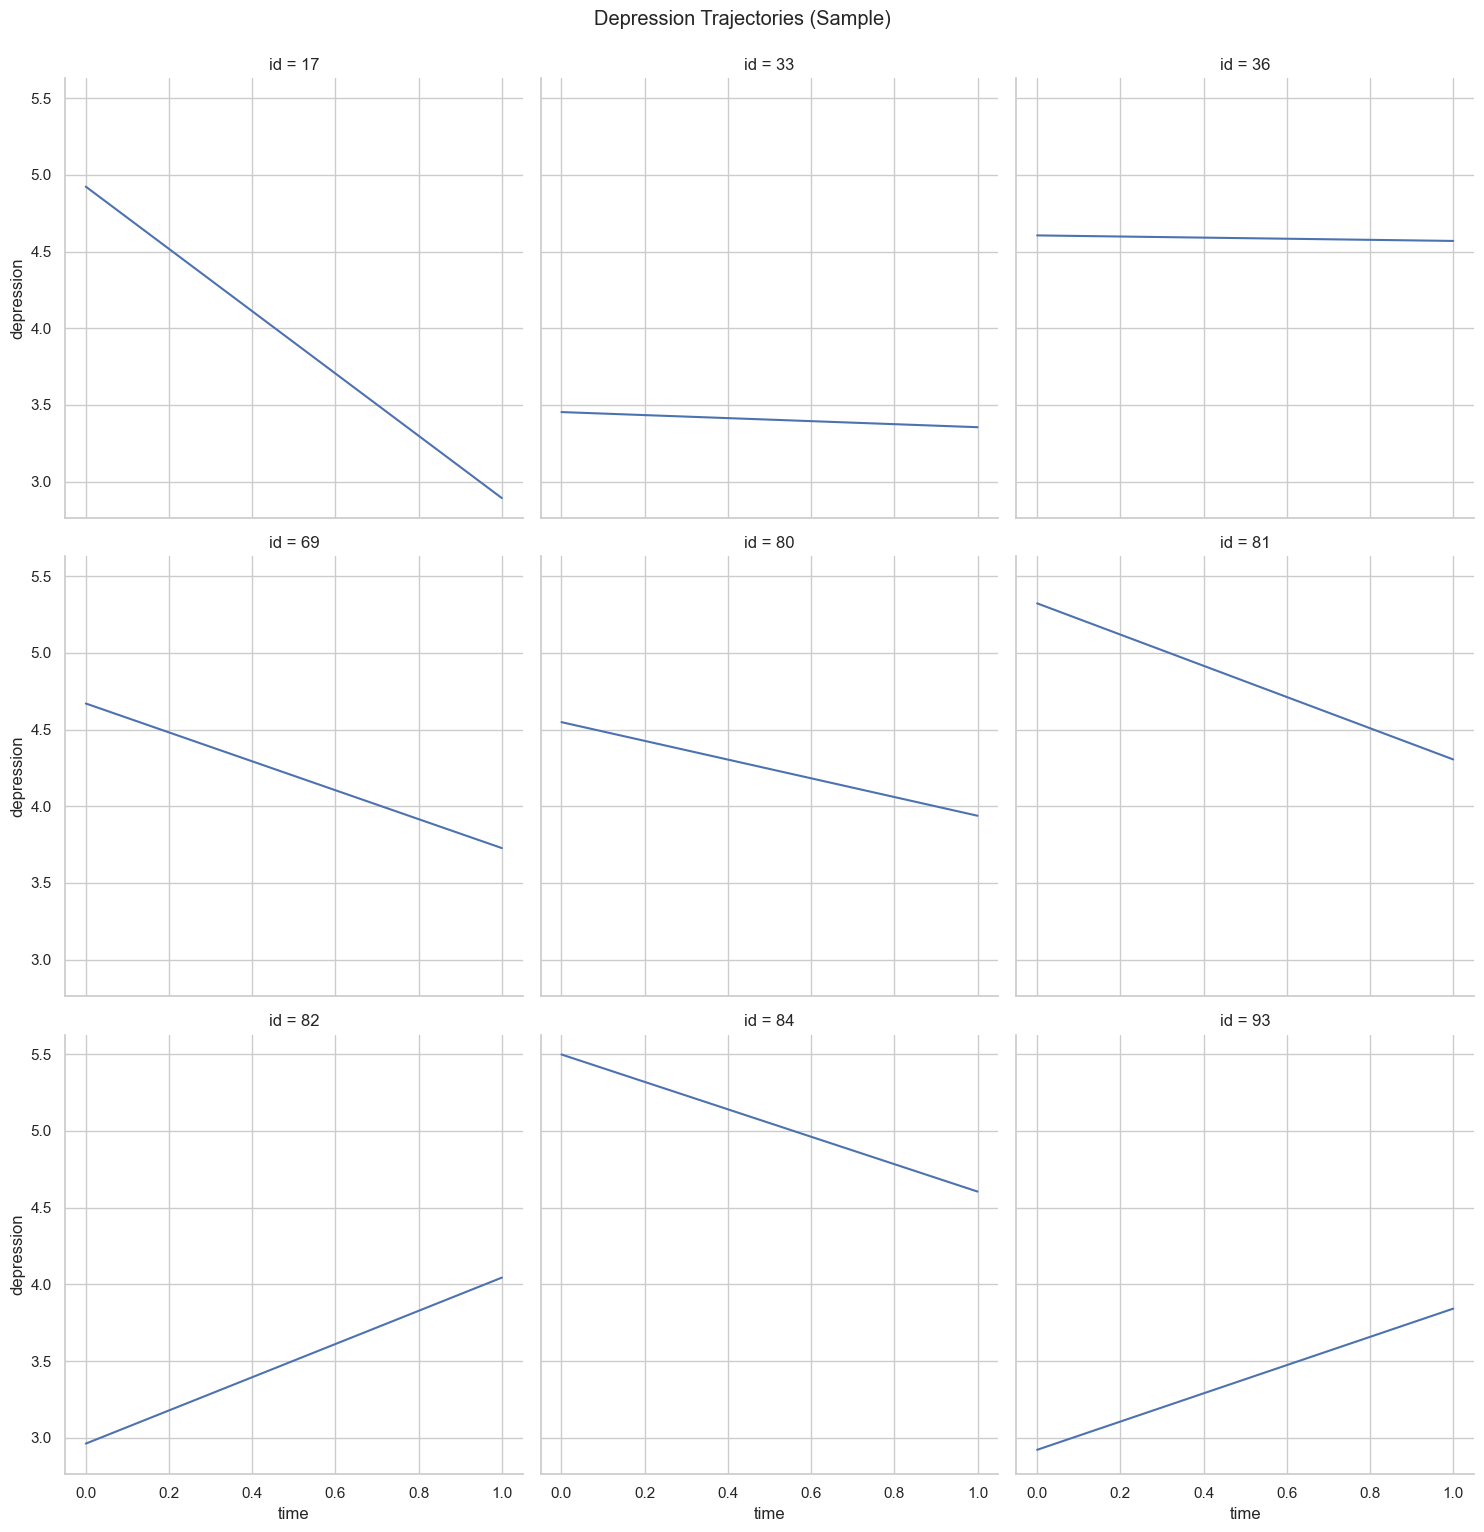

In [4]:
# Facet by individual (small sample)
sample_ids = long_df['id'].drop_duplicates().sample(9, random_state=1)
sns.relplot(data=long_df[long_df['id'].isin(sample_ids)], x='time', y='depression', col='id', kind='line', col_wrap=3)
plt.suptitle('Depression Trajectories (Sample)', y=1.02)
plt.show()

## Group-Level Mean Trends Over Time with Confidence Intervals

/var/folders/1_/lcw4zvln3rd_5hb93nn0kqw00000gn/T/ipykernel_23658/3022575043.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=long_df, x='time', y='depression', ci='sd', marker='o')


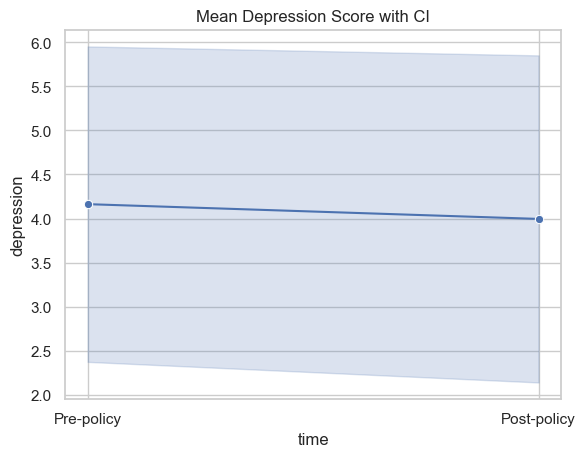

In [5]:
# Mean depression score over time
sns.lineplot(data=long_df, x='time', y='depression', ci='sd', marker='o')
plt.xticks([0, 1], ['Pre-policy', 'Post-policy'])
plt.title('Mean Depression Score with CI')
plt.show()

## Highlighting an Intervention or Event

/var/folders/1_/lcw4zvln3rd_5hb93nn0kqw00000gn/T/ipykernel_23658/1865890613.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=long_df, x='time', y='depression', ci='sd', marker='o')


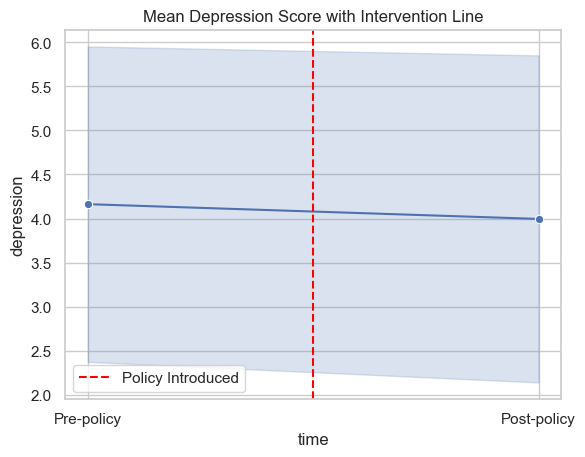

In [6]:
# Plot with vertical line for intervention
sns.lineplot(data=long_df, x='time', y='depression', ci='sd', marker='o')
plt.axvline(0.5, color='red', linestyle='--', label='Policy Introduced')
plt.legend()
plt.xticks([0, 1], ['Pre-policy', 'Post-policy'])
plt.title('Mean Depression Score with Intervention Line')
plt.show()

## Shading Pre/Post Periods

/var/folders/1_/lcw4zvln3rd_5hb93nn0kqw00000gn/T/ipykernel_23658/3469054397.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=long_df, x='time', y='depression', ci='sd', marker='o')


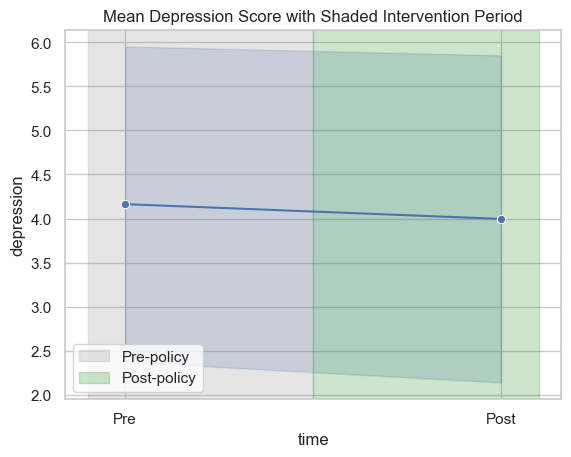

In [7]:
sns.lineplot(data=long_df, x='time', y='depression', ci='sd', marker='o')
plt.axvspan(-0.1, 0.5, color='gray', alpha=0.2, label='Pre-policy')
plt.axvspan(0.5, 1.1, color='green', alpha=0.2, label='Post-policy')
plt.xticks([0, 1], ['Pre', 'Post'])
plt.legend()
plt.title('Mean Depression Score with Shaded Intervention Period')
plt.show()

## 🛠 Practice: Visualize Pre/Post Policy Change
Try the following:
- Pick 6 random individuals and plot their pre/post depression scores
- Plot the mean over time for the whole sample
- Add a shaded region or vertical line to mark the policy moment
- If you’re comfortable, simulate different effects for treatment vs. control